# Deep Learning MLB Classification Model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
from requests import get
import urllib.request
import csv

import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':300})

In [2]:
seed = np.random.seed(123) #for reproducibility

In [3]:
hist_mlb = pd.read_excel('MLB_Model.xlsx')
hist_mlb.head()

,year,month,day,date,num. of game,day_of_week,away_team,away_league,away_game_num,home_team,...,home_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,away_starting_pitcher_id,away_starting_pitcher_name,home_starting_pitcher_id,home_starting_pitcher_name,info_acquired
0,2017,4,2,2017-04-02,0,Sun,SFN,NL,1,ARI,...,Tony Lovullo,rodnf001,Fernando Rodney,melam001,Mark Melancon,bumgm001,Madison Bumgarner,greiz001,Zack Greinke,Y
1,2017,4,2,2017-04-02,0,Sun,CHN,NL,1,SLN,...,Mike Matheny,oh--s001,Seung Hwan Oh,montm002,Mike Montgomery,lestj001,Jon Lester,martc006,Carlos Martinez,Y
2,2017,4,2,2017-04-02,0,Sun,NYA,AL,1,TBA,...,Kevin Cash,archc001,Chris Archer,tanam001,Masahiro Tanaka,tanam001,Masahiro Tanaka,archc001,Chris Archer,Y
3,2017,4,3,2017-04-03,0,Mon,PHI,NL,1,CIN,...,Bryan Price,hellj001,Jeremy Hellickson,felds001,Scott Feldman,hellj001,Jeremy Hellickson,felds001,Scott Feldman,Y
4,2017,4,3,2017-04-03,0,Mon,SDN,NL,1,LAN,...,Dave Roberts,kersc001,Clayton Kershaw,chacj001,Jhoulys Chacin,chacj001,Jhoulys Chacin,kersc001,Clayton Kershaw,Y


In [4]:
hist_mlb.describe()

,year,month,day,num. of game,away_game_num,home_game_num,away_score,home_score,winner,total_outs,...,home_ind_ER,home_team_ER,home_wild_pitches,home_balks,home_putouts,home_assists,home_errors,home_passed_balls,home_dbl_plays,home_triple_plays
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,...,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,2018.219223,6.686737,16.110283,0.055691,75.905716,75.893991,4.578652,4.706033,0.465804,53.360283,...,4.240596,4.233512,0.358207,0.036273,27.431363,9.439301,0.576575,0.076575,0.875794,0.000855
std,0.992059,1.758175,8.923582,0.299547,47.258677,47.287901,3.274956,3.232557,0.498860,5.058388,...,3.126931,3.121878,0.630287,0.190858,2.368166,3.098892,0.792584,0.276295,0.897092,0.029228
min,2017.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,5.000000,8.000000,0.000000,35.000000,35.000000,2.000000,2.000000,0.000000,51.000000,...,2.000000,2.000000,0.000000,0.000000,27.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,0.000000,72.000000,71.000000,4.000000,4.000000,0.000000,54.000000,...,4.000000,4.000000,0.000000,0.000000,27.000000,9.000000,0.000000,0.000000,1.000000,0.000000
75%,2019.000000,8.000000,24.000000,0.000000,117.000000,117.000000,6.000000,6.000000,1.000000,54.000000,...,6.000000,6.000000,1.000000,0.000000,27.000000,11.000000,1.000000,0.000000,1.000000,0.000000
max,2020.000000,10.000000,31.000000,2.000000,163.000000,163.000000,24.000000,29.000000,1.000000,113.000000,...,23.000000,23.000000,5.000000,2.000000,57.000000,28.000000,5.000000,3.000000,6.000000,1.000000


In [5]:
print(hist_mlb.isna().sum())

year                             0
month                            0
day                              0
date                             0
num. of game                     0
day_of_week                      0
away_team                        0
away_league                      0
away_game_num                    0
home_team                        0
home_league                      0
home_game_num                    0
away_score                       0
home_score                       0
winner                           0
total_outs                       0
day/night                        0
attendance                     898
gamelength(min)                  0
visiting inning scores          13
home inning scores               0
away_AB                          0
away_hits                        0
away_dbls                        0
away_trpls                       0
away_hr                          0
away_rbi                         0
away_sac_hits                    0
away_sac_flies      

In [6]:
hist_mlb.shape

(8188, 90)

In [7]:
columns = hist_mlb.columns.tolist()
#columns
print(columns)

['year', 'month', 'day', 'date', 'num. of game', 'day_of_week', 'away_team', 'away_league', 'away_game_num', 'home_team', 'home_league', 'home_game_num', 'away_score', 'home_score', 'winner', 'total_outs', 'day/night', 'attendance', 'gamelength(min)', 'visiting inning scores', 'home inning scores', 'away_AB', 'away_hits', 'away_dbls', 'away_trpls', 'away_hr', 'away_rbi', 'away_sac_hits', 'away_sac_flies', 'away_hit_by_pitch', 'away_walks', 'away_int_walks', 'away_strikeouts', 'away_stolen_bases', 'away_caught_stealing', 'away_grounded_into_dbl_play', 'away_LOB', 'away_pitchers_used', 'away_ind_ER', 'away_team_ER', 'away_wild_pitches', 'away_balks', 'away_putouts', 'away_assists', 'away_errors', 'away_passed_balls', 'away_dbl_plays', 'away_trpl_plays', 'home_AB', 'home_hits', 'home_dbls', 'home_trpls', 'home_hrs', 'home_rbis', 'home_sac_hits', 'home_sac_flies', 'home_hit_by_pitch', 'home_walks', 'home_int_walks', 'home_strikeouts', 'home_stolen_bases', 'home_caught_stealing', 'home_grou

In [8]:
df = hist_mlb[['date','away_AB', 'away_hits', 'away_dbls', 'away_trpls', 'away_hr', 'away_rbi', 'away_sac_hits', 'away_sac_flies', 
               'away_hit_by_pitch', 'away_walks', 'away_int_walks', 'away_strikeouts', 'away_stolen_bases', 'away_caught_stealing', 'away_grounded_into_dbl_play', 
               'away_LOB','away_team_ER', 'away_wild_pitches', 'away_balks','away_assists', 'away_errors', 'away_passed_balls', 'away_dbl_plays','home_AB', 'home_hits', 
               'home_dbls', 'home_trpls', 'home_hrs', 'home_rbis', 'home_sac_hits', 'home_sac_flies', 'home_hit_by_pitch', 'home_walks', 'home_int_walks', 'home_strikeouts', 
               'home_stolen_bases', 'home_caught_stealing', 'home_grounded_into_dbl_play', 'home_LOB','home_team_ER', 'home_wild_pitches', 'home_balks',
              'home_assists', 'home_errors', 'home_passed_balls', 'home_dbl_plays','winner']]

In [9]:
columns1 = df.columns.tolist()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':300})

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [11]:
df1 = df[['away_AB', 'away_hits', 'away_dbls','away_trpls', 'away_hr', 'away_rbi', 'away_sac_flies','away_walks','away_int_walks','away_stolen_bases','away_LOB',
          'home_team_ER','home_strikeouts','home_errors','home_wild_pitches','home_rbis','away_team_ER','home_AB','home_hits','home_hrs','home_dbls','home_trpls',
          'home_sac_flies','home_walks','home_int_walks','home_stolen_bases','home_LOB','away_errors','away_strikeouts','away_wild_pitches','winner']]

In [12]:
df1 = df1.dropna()

In [13]:
df1.head()

,away_AB,away_hits,away_dbls,away_trpls,away_hr,away_rbi,away_sac_flies,away_walks,away_int_walks,away_stolen_bases,...,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,away_errors,away_strikeouts,away_wild_pitches,winner
0,34,11,2,1,2,5,2,5,0,2,...,1,0,0,0,0,6,0,7,0,0
1,34,8,1,0,1,3,0,0,0,0,...,0,1,8,1,2,14,0,12,1,0
2,36,9,1,0,0,3,1,1,0,0,...,0,1,3,0,1,9,1,8,1,0
3,35,10,4,1,2,4,0,5,1,0,...,1,1,2,0,0,7,0,8,0,1
4,33,5,1,0,1,3,0,0,0,0,...,0,1,5,2,0,6,0,9,3,0


In [14]:
print(df1.isna().sum())

away_AB              0
away_hits            0
away_dbls            0
away_trpls           0
away_hr              0
away_rbi             0
away_sac_flies       0
away_walks           0
away_int_walks       0
away_stolen_bases    0
away_LOB             0
home_team_ER         0
home_strikeouts      0
home_errors          0
home_wild_pitches    0
home_rbis            0
away_team_ER         0
home_AB              0
home_hits            0
home_hrs             0
home_dbls            0
home_trpls           0
home_sac_flies       0
home_walks           0
home_int_walks       0
home_stolen_bases    0
home_LOB             0
away_errors          0
away_strikeouts      0
away_wild_pitches    0
winner               0
dtype: int64


In [15]:
X = df1.drop(columns=['winner'])
y = df1[['winner']]

In [16]:
df1.head()

,away_AB,away_hits,away_dbls,away_trpls,away_hr,away_rbi,away_sac_flies,away_walks,away_int_walks,away_stolen_bases,...,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,away_errors,away_strikeouts,away_wild_pitches,winner
0,34,11,2,1,2,5,2,5,0,2,...,1,0,0,0,0,6,0,7,0,0
1,34,8,1,0,1,3,0,0,0,0,...,0,1,8,1,2,14,0,12,1,0
2,36,9,1,0,0,3,1,1,0,0,...,0,1,3,0,1,9,1,8,1,0
3,35,10,4,1,2,4,0,5,1,0,...,1,1,2,0,0,7,0,8,0,1
4,33,5,1,0,1,3,0,0,0,0,...,0,1,5,2,0,6,0,9,3,0


In [17]:
print(df1.isna().sum())

away_AB              0
away_hits            0
away_dbls            0
away_trpls           0
away_hr              0
away_rbi             0
away_sac_flies       0
away_walks           0
away_int_walks       0
away_stolen_bases    0
away_LOB             0
home_team_ER         0
home_strikeouts      0
home_errors          0
home_wild_pitches    0
home_rbis            0
away_team_ER         0
home_AB              0
home_hits            0
home_hrs             0
home_dbls            0
home_trpls           0
home_sac_flies       0
home_walks           0
home_int_walks       0
home_stolen_bases    0
home_LOB             0
away_errors          0
away_strikeouts      0
away_wild_pitches    0
winner               0
dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.275, random_state = seed)

In [19]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

X_train.shape

Using TensorFlow backend.


(5936, 30)

In [20]:
# evaluate model with standardized dataset
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
X_train.shape

(5936, 30)

In [22]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential()
model.add(Dense(30, activation='relu',input_dim=30))
model.add(Dense(30, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))




# output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer = 'normal'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
##### #train model
model.fit(X_train, y_train, epochs=1, batch_size=1220)
#model.fit(X_train, y_train, epochs=2, batch_size=900)


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
5936/5936 [==============================] - 1s 91us/step - loss: 0.6755 - accuracy: 0.5969


In [24]:
y_pred=model.predict(X_test)
y_pred = [round(x[0]) for x in y_pred]


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[937 268]
 [221 826]]


In [26]:
accuracy_score(y_test,y_pred)

0.7828596802841918

In [27]:
#model = estimators

In [28]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [29]:
# Precision 
precision_score(y_test, y_pred)

0.7550274223034735

In [30]:
# Recall
recall_score(y_test, y_pred)

0.7889207258834766

In [31]:
# F1 score
f1_score(y_test,y_pred)

0.7716020551144326

# Lets backtest on the 2019 season 

In [32]:
#df2 = pd.read_excel('mlb_2019.xlsx')
#df2.head()

In [33]:
#print(df2.isna().sum())

In [34]:
#table = df2[['away_AB', 'away_hits', 'away_dbls','away_trpls', 'away_hr', 'away_rbi', 'away_sac_flies','away_walks','away_int_walks','away_stolen_bases','away_LOB',
#          'home_team_ER','home_strikeouts','home_errors','home_wild_pitches','home_rbis','away_team_ER','home_AB','home_hits','home_hrs','home_dbls','home_trpls',
#          'home_sac_flies','home_walks','home_int_walks','home_stolen_bases','home_LOB','away_errors','away_strikeouts','away_wild_pitches']]

In [35]:
#table.columns

In [36]:
#preds = model.predict(table)
#prob_ci = model.predict_proba(table)

#preds = [round(x[0]) for x in prob_ci]

#print(prob_ci)

In [37]:


#df2['pred_result'] = preds
#df2['prob_ci'] = prob_ci

#df2.head(10)

In [38]:
#df2.describe()

In [39]:
#from sklearn.metrics import classification_report

#report = classification_report(df2['winner'], df2['pred_result'])
#print(report)

In [40]:
#from sklearn.metrics import confusion_matrix
#cm1 = confusion_matrix(df2['winner'], df2['pred_result'])
#print(cm1)

In [41]:
#accuracy_score(df2['winner'], df2['pred_result'])

In [42]:
#_ = plt.hist(df2['prob_ci'],bins = 10)
#_ = plt.ylabel("Frequency")
#_ = plt.xlabel("prob_ci")
#plt.show()

In [43]:
#df2.to_excel('mlb19_preds.xlsx', index=0)

# Lets Predict next set of 2020 Games

In [44]:
df3 = pd.read_excel('MLB_Data.xlsx', sheet_name='Games To Predict20')
df3.head()

,Date,Away Team,Home Team,Away Pitcher,Home Pitcher,away_AB,away_hits,away_dbls,away_trpls,away_hr,...,home_AB,home_hits,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB
0,2020-07-23,NYY,WSH,Gerrit Cole,Max Scherzer,31.720000,8.080000,1.440000,0.080000,1.800000,...,32.800000,8.600000,1.240000,1.480000,0.200000,0.400000,2.920000,0.120000,0.280000,7.440000
1,2020-07-23,SF,LAD,Johnny Cueto,Dustin May,33.833333,8.633333,1.566667,0.233333,1.266667,...,33.933333,8.466667,1.966667,1.533333,0.100000,0.166667,3.566667,0.066667,0.466667,5.900000
2,2020-07-24,ATL,NYM,Mike Soroka,Jacob deGrom,34.000000,8.821429,2.285714,0.035714,1.357143,...,34.153846,9.153846,1.307692,1.653846,0.192308,0.384615,3.961538,0.153846,0.538462,6.730769
3,2020-07-24,DET,CIN,Matthew Boyd,Sonny Gray,33.076923,7.730769,1.615385,0.192308,1.423077,...,31.076923,6.423077,1.538462,1.307692,0.076923,0.076923,4.153846,0.038462,0.461538,6.153846
4,2020-07-24,TOR,TB,Hyun-Jin Ryu,Charlie Morton,34.153846,8.423077,1.384615,0.076923,1.730769,...,33.068966,8.137931,1.206897,1.965517,0.275862,0.275862,4.275862,0.103448,0.379310,7.241379


In [45]:
print(df3.isna().sum())

Date                  0
Away Team             0
Home Team             0
Away Pitcher         73
Home Pitcher          2
away_AB               0
away_hits             0
away_dbls             0
away_trpls            0
away_hr               0
away_rbi              0
away_sac_flies        0
away_walks            0
away_int_walks        0
away_stolen_bases     0
away_LOB              0
away_team_ER         98
away_errors           0
away_strikeouts      96
away_wild_pitches     0
home_team_ER          3
home_strikeouts      99
home_errors           3
home_wild_pitches     3
home_rbis             3
home_AB               3
home_hits             3
home_hrs              3
home_dbls             3
home_trpls            3
home_sac_flies        3
home_walks            3
home_int_walks        3
home_stolen_bases     3
home_LOB              3
dtype: int64


In [46]:
df3 = df3.dropna()

In [47]:
print(df3.isna().sum())

Date                 0
Away Team            0
Home Team            0
Away Pitcher         0
Home Pitcher         0
away_AB              0
away_hits            0
away_dbls            0
away_trpls           0
away_hr              0
away_rbi             0
away_sac_flies       0
away_walks           0
away_int_walks       0
away_stolen_bases    0
away_LOB             0
away_team_ER         0
away_errors          0
away_strikeouts      0
away_wild_pitches    0
home_team_ER         0
home_strikeouts      0
home_errors          0
home_wild_pitches    0
home_rbis            0
home_AB              0
home_hits            0
home_hrs             0
home_dbls            0
home_trpls           0
home_sac_flies       0
home_walks           0
home_int_walks       0
home_stolen_bases    0
home_LOB             0
dtype: int64


In [48]:
table1 = df3[['away_AB', 'away_hits', 'away_dbls','away_trpls', 'away_hr', 'away_rbi', 'away_sac_flies','away_walks','away_int_walks','away_stolen_bases','away_LOB',
          'home_team_ER','home_strikeouts','home_errors','home_wild_pitches','home_rbis','away_team_ER','home_AB','home_hits','home_hrs','home_dbls','home_trpls',
          'home_sac_flies','home_walks','home_int_walks','home_stolen_bases','home_LOB','away_errors','away_strikeouts','away_wild_pitches']]

In [49]:
table1.columns

Index(['away_AB', 'away_hits', 'away_dbls', 'away_trpls', 'away_hr',
       'away_rbi', 'away_sac_flies', 'away_walks', 'away_int_walks',
       'away_stolen_bases', 'away_LOB', 'home_team_ER', 'home_strikeouts',
       'home_errors', 'home_wild_pitches', 'home_rbis', 'away_team_ER',
       'home_AB', 'home_hits', 'home_hrs', 'home_dbls', 'home_trpls',
       'home_sac_flies', 'home_walks', 'home_int_walks', 'home_stolen_bases',
       'home_LOB', 'away_errors', 'away_strikeouts', 'away_wild_pitches'],
      dtype='object')

In [50]:
table1.shape

(863, 30)

In [51]:
preds1 = model.predict(table1)
prob_ci1 = model.predict_proba(table1)

preds1 = [round(x[0]) for x in prob_ci1]

#print(prob_ci)

In [52]:


df3['pred_result'] = preds1
df3['prob_ci'] = prob_ci1

df3.head(10)

,Date,Away Team,Home Team,Away Pitcher,Home Pitcher,away_AB,away_hits,away_dbls,away_trpls,away_hr,...,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,pred_result,prob_ci
0,2020-07-23,NYY,WSH,Gerrit Cole,Max Scherzer,31.720000,8.080000,1.440000,0.080000,1.800000,...,1.240000,1.480000,0.200000,0.400000,2.920000,0.120000,0.280000,7.440000,1.0,0.509136
1,2020-07-23,SF,LAD,Johnny Cueto,Dustin May,33.833333,8.633333,1.566667,0.233333,1.266667,...,1.966667,1.533333,0.100000,0.166667,3.566667,0.066667,0.466667,5.900000,0.0,0.495251
2,2020-07-24,ATL,NYM,Mike Soroka,Jacob deGrom,34.000000,8.821429,2.285714,0.035714,1.357143,...,1.307692,1.653846,0.192308,0.384615,3.961538,0.153846,0.538462,6.730769,1.0,0.514641
3,2020-07-24,DET,CIN,Matthew Boyd,Sonny Gray,33.076923,7.730769,1.615385,0.192308,1.423077,...,1.538462,1.307692,0.076923,0.076923,4.153846,0.038462,0.461538,6.153846,1.0,0.511156
4,2020-07-24,TOR,TB,Hyun-Jin Ryu,Charlie Morton,34.153846,8.423077,1.384615,0.076923,1.730769,...,1.206897,1.965517,0.275862,0.275862,4.275862,0.103448,0.379310,7.241379,0.0,0.498594
5,2020-07-24,MIA,PHI,Brandon Woodruff,Kyle Hendricks,32.454545,7.863636,1.181818,0.136364,0.954545,...,1.458333,1.500000,0.208333,0.208333,3.750000,0.041667,0.500000,6.291667,1.0,0.501439
7,2020-07-24,KC,CLE,Danny Duffy,Shane Bieber,32.750000,8.142857,1.821429,0.071429,1.107143,...,0.892857,1.250000,0.071429,0.142857,4.428571,0.071429,0.357143,5.821429,0.0,0.495497
8,2020-07-24,BAL,BOS,Tommy Milone,Nathan Eovaldi,34.285714,8.928571,2.071429,0.071429,1.464286,...,1.241379,1.965517,0.137931,0.068966,3.034483,0.103448,0.275862,7.448276,1.0,0.529576
9,2020-07-24,COL,TEX,German Marquez,Lance Lynn,34.321429,8.928571,1.321429,0.285714,1.250000,...,0.851852,1.555556,0.148148,0.259259,3.259259,0.074074,0.925926,6.555556,1.0,0.520242
10,2020-07-24,MIN,CHW,Jose Berrios,Lucas Giolito,32.758621,8.034483,1.206897,0.034483,1.448276,...,1.896552,1.551724,0.068966,0.172414,2.758621,0.000000,0.275862,6.620690,1.0,0.510986


In [53]:
df3.describe()

,away_AB,away_hits,away_dbls,away_trpls,away_hr,away_rbi,away_sac_flies,away_walks,away_int_walks,away_stolen_bases,...,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,pred_result,prob_ci
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,...,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,33.058803,8.029777,1.567144,0.136142,1.303560,4.475068,0.223738,3.599403,0.101835,0.477827,...,1.310628,1.580588,0.137942,0.222018,3.442768,0.101468,0.475915,6.559661,0.563152,0.501496
std,1.090196,0.748206,0.263789,0.069811,0.294628,0.523265,0.082725,0.590343,0.062490,0.223550,...,0.293367,0.268323,0.069196,0.083005,0.507157,0.059572,0.221770,0.535834,0.496283,0.014435
min,29.882353,6.372093,1.058824,0.034483,0.758621,3.211538,0.033333,2.400000,0.000000,0.185185,...,0.758621,1.058824,0.034483,0.033333,2.465116,0.000000,0.185185,5.058824,0.000000,0.367232
25%,32.454545,7.413793,1.384615,0.076923,1.107143,4.049135,0.166667,3.200000,0.066667,0.321429,...,1.107143,1.406784,0.076923,0.166667,3.092262,0.066667,0.311806,6.153846,0.000000,0.493259
50%,33.068966,8.100000,1.512195,0.116667,1.266667,4.461538,0.214286,3.600000,0.100000,0.403846,...,1.292683,1.533333,0.117647,0.214286,3.384615,0.102564,0.416667,6.566667,1.000000,0.501865
75%,34.000000,8.630620,1.720991,0.192308,1.464286,4.844444,0.275862,4.000000,0.142857,0.538462,...,1.464286,1.750000,0.200000,0.275862,3.834848,0.142857,0.538462,6.900000,1.000000,0.511157
max,34.714286,9.346939,2.285714,0.300000,1.966667,5.818182,0.405405,6.941667,0.294118,1.000000,...,1.966667,2.285714,0.285714,0.404762,4.428571,0.290909,1.000000,7.760000,1.000000,0.533274


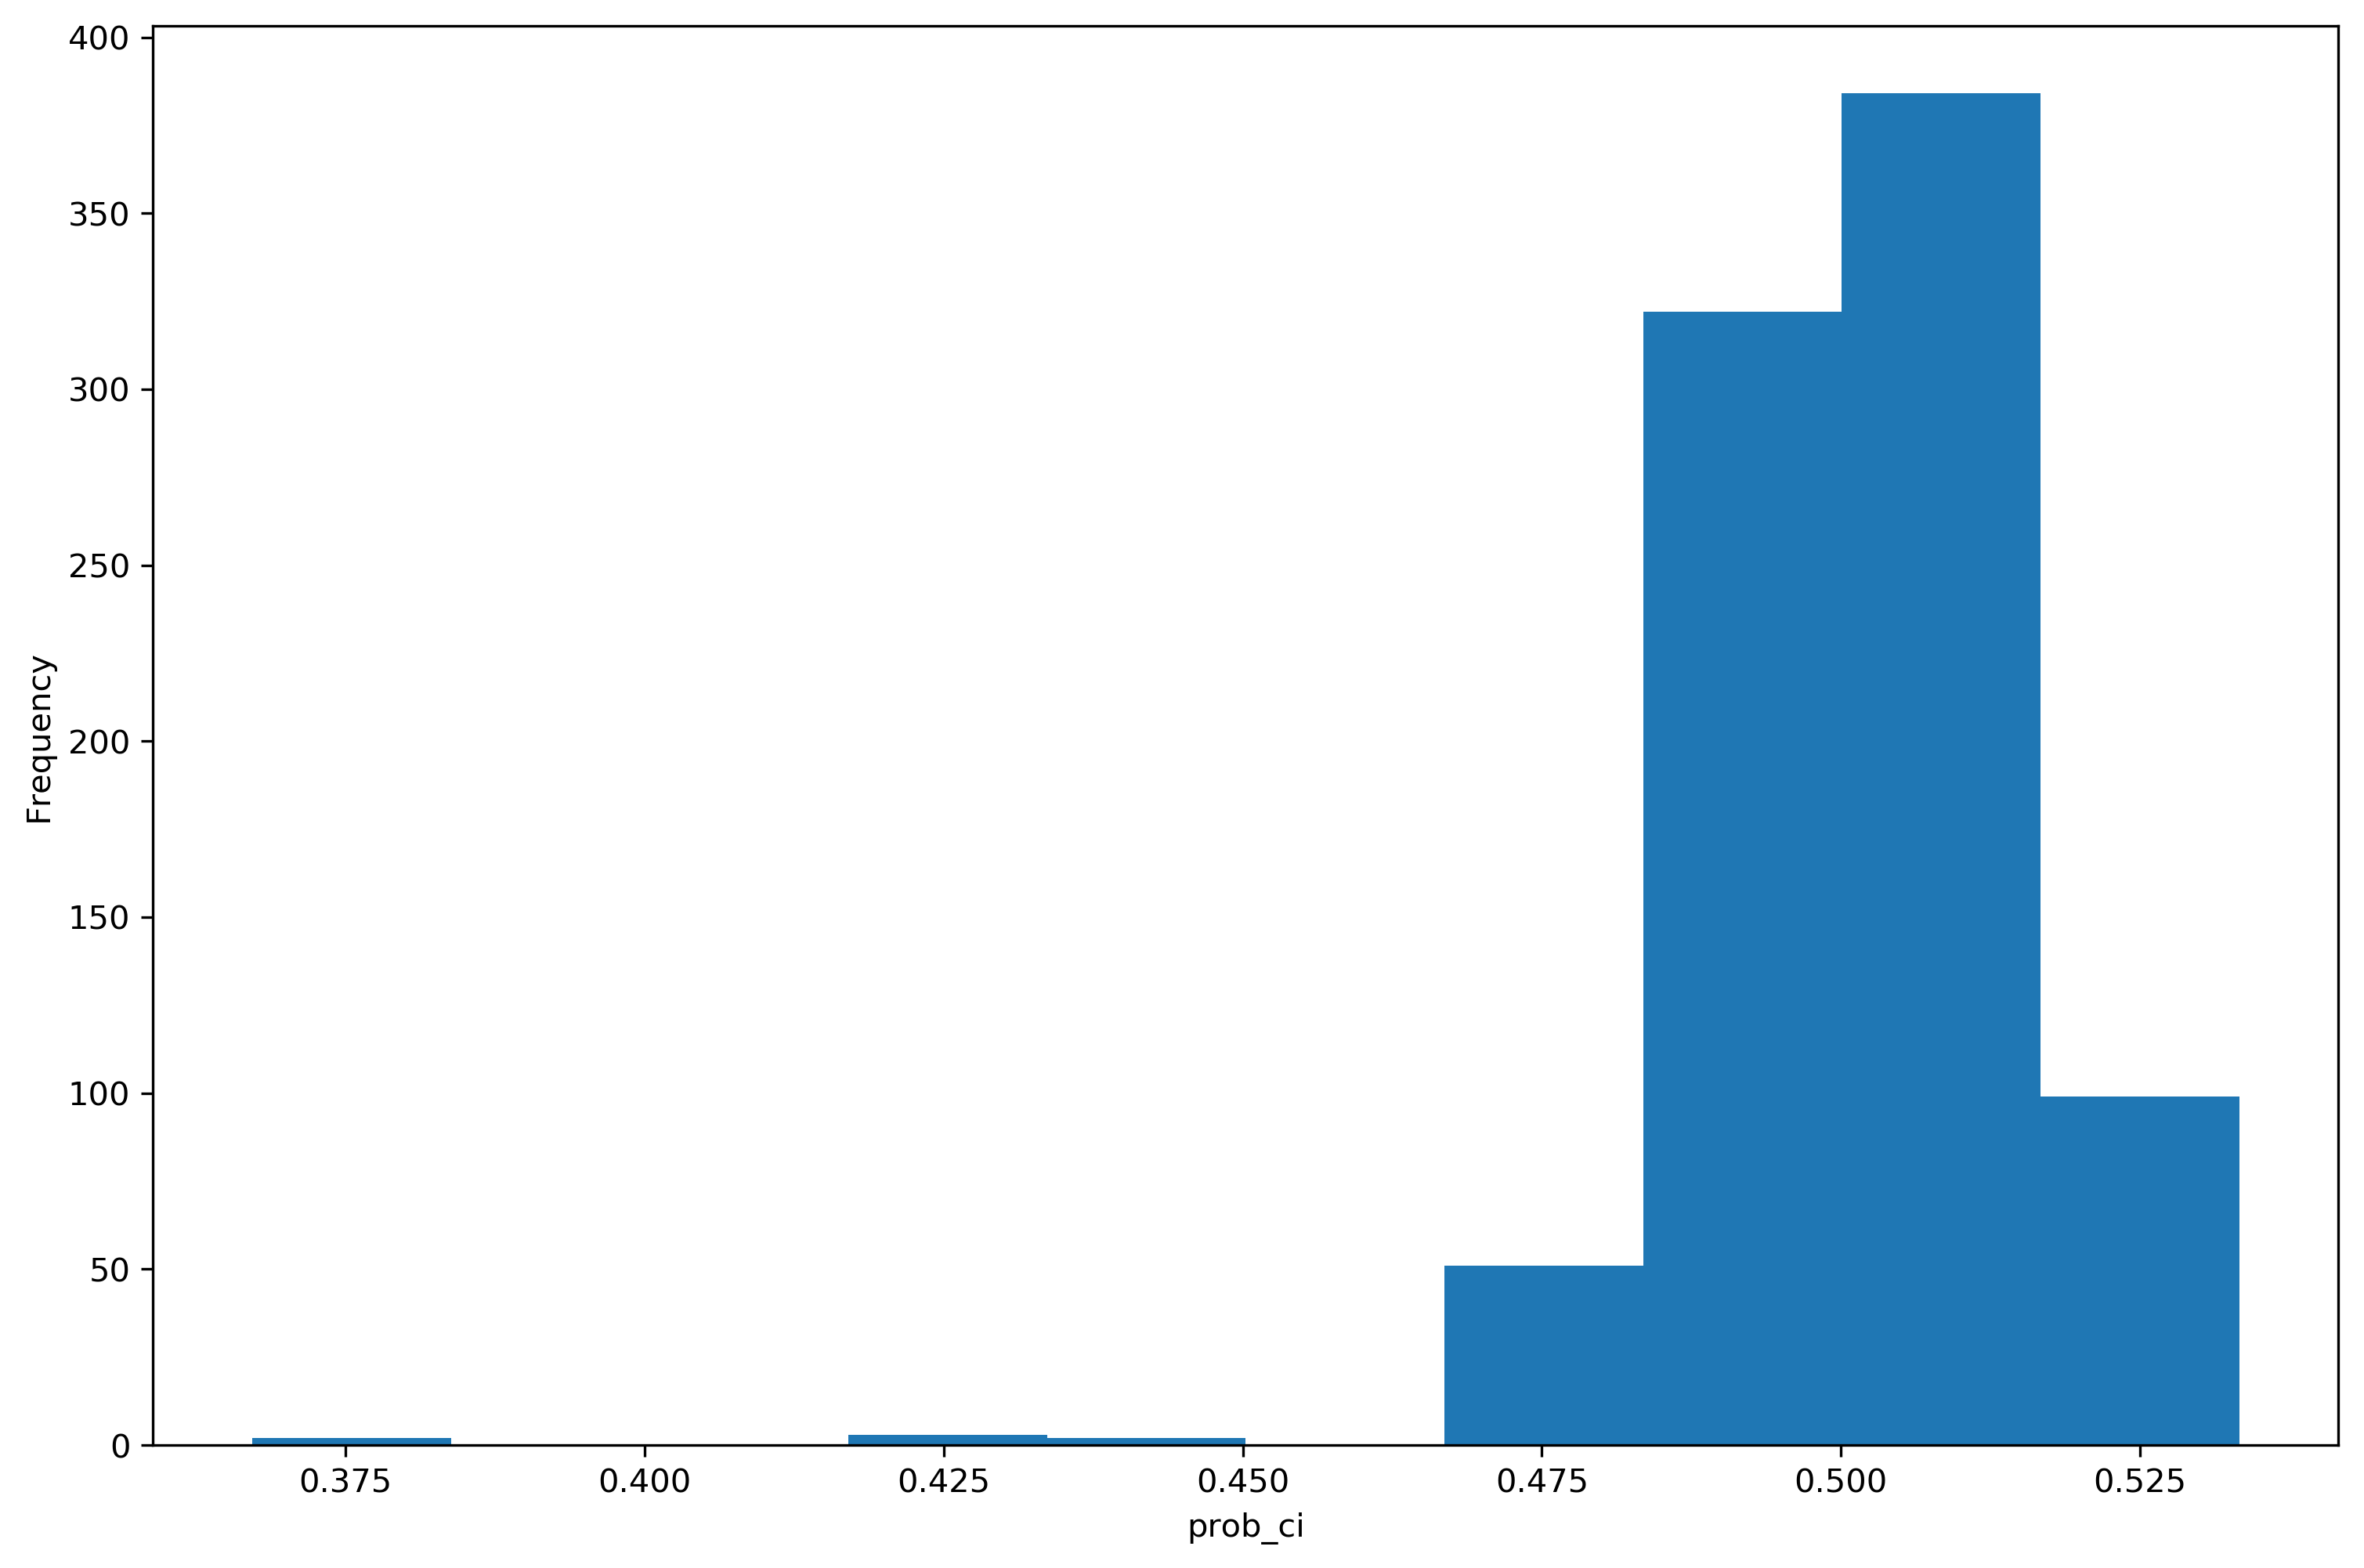

In [54]:
_ = plt.hist(df3['prob_ci'],bins = 10)
_ = plt.ylabel("Frequency")
_ = plt.xlabel("prob_ci")
plt.show()

In [55]:
df3.to_excel('mlb20_preds.xlsx')

# Lets Predict next set of 2021 Games

In [56]:
df4 = pd.read_excel('MLB_Data.xlsx', sheet_name='Games To Predict21')
df4.head()

,Date,Away Team,Home Team,Away Pitcher,Home Pitcher,away_AB,away_hits,away_dbls,away_trpls,away_hr,...,home_AB,home_hits,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB
0,2021-04-01,TOR,NYY,Jordan Romano,Nick Nelson,33.907407,7.740741,1.537037,0.111111,1.500000,...,32.473684,6.894737,1.175439,1.140351,0.035088,0.140351,2.824561,0.035088,0.228070,5.68
1,2021-04-01,CLE,DET,Shane Bieber,Matthew Boyd,32.129630,7.222222,1.462963,0.148148,1.166667,...,32.660714,8.000000,0.946429,1.160714,0.232143,0.196429,3.517857,0.017857,0.535714,6.79
2,2021-04-01,BAL,BOS,0,0,33.053571,8.607143,1.732143,0.142857,1.053571,...,33.750000,8.232143,1.250000,2.214286,0.071429,0.214286,3.428571,0.053571,0.410714,7.12
3,2021-04-01,MIN,MIL,Randy Dobnak,Josh Hader,33.500000,8.446429,1.803571,0.107143,1.375000,...,32.767857,7.053571,1.214286,1.250000,0.107143,0.178571,3.392857,0.125000,0.446429,6.43
4,2021-04-01,PIT,CHC,Sam Howard,Kyle Hendricks,32.981818,8.127273,1.600000,0.181818,0.690909,...,32.750000,7.892857,1.267857,1.392857,0.196429,0.303571,3.625000,0.125000,0.607143,7.55


In [57]:
print(df4.isna().sum())

Date                  0
Away Team             0
Home Team             0
Away Pitcher          1
Home Pitcher          1
away_AB               1
away_hits             1
away_dbls             1
away_trpls            1
away_hr               1
away_rbi              1
away_sac_flies        1
away_walks           72
away_int_walks        1
away_stolen_bases     1
away_LOB              1
away_team_ER          1
away_errors           1
away_strikeouts      72
away_wild_pitches     1
home_team_ER          1
home_strikeouts      76
home_errors           1
home_wild_pitches     1
home_rbis             1
home_AB               1
home_hits             1
home_hrs              1
home_dbls             1
home_trpls            1
home_sac_flies        1
home_walks            1
home_int_walks        1
home_stolen_bases     1
home_LOB              1
dtype: int64


In [58]:
df4 = df4.dropna(subset=['away_team_ER','home_team_ER','away_strikeouts','home_strikeouts'])

In [59]:
print(df4.isna().sum())

Date                 0
Away Team            0
Home Team            0
Away Pitcher         0
Home Pitcher         0
away_AB              0
away_hits            0
away_dbls            0
away_trpls           0
away_hr              0
away_rbi             0
away_sac_flies       0
away_walks           0
away_int_walks       0
away_stolen_bases    0
away_LOB             0
away_team_ER         0
away_errors          0
away_strikeouts      0
away_wild_pitches    0
home_team_ER         0
home_strikeouts      0
home_errors          0
home_wild_pitches    0
home_rbis            0
home_AB              0
home_hits            0
home_hrs             0
home_dbls            0
home_trpls           0
home_sac_flies       0
home_walks           0
home_int_walks       0
home_stolen_bases    0
home_LOB             0
dtype: int64


In [60]:
table2 = df4[['away_AB', 'away_hits', 'away_dbls','away_trpls', 'away_hr', 'away_rbi', 'away_sac_flies','away_walks','away_int_walks','away_stolen_bases','away_LOB',
          'home_team_ER','home_strikeouts','home_errors','home_wild_pitches','home_rbis','away_team_ER','home_AB','home_hits','home_hrs','home_dbls','home_trpls',
          'home_sac_flies','home_walks','home_int_walks','home_stolen_bases','home_LOB','away_errors','away_strikeouts','away_wild_pitches']]

In [61]:
table2.columns

Index(['away_AB', 'away_hits', 'away_dbls', 'away_trpls', 'away_hr',
       'away_rbi', 'away_sac_flies', 'away_walks', 'away_int_walks',
       'away_stolen_bases', 'away_LOB', 'home_team_ER', 'home_strikeouts',
       'home_errors', 'home_wild_pitches', 'home_rbis', 'away_team_ER',
       'home_AB', 'home_hits', 'home_hrs', 'home_dbls', 'home_trpls',
       'home_sac_flies', 'home_walks', 'home_int_walks', 'home_stolen_bases',
       'home_LOB', 'away_errors', 'away_strikeouts', 'away_wild_pitches'],
      dtype='object')

In [62]:
table2.shape

(830, 30)

In [63]:
preds2 = model.predict(table2)
prob_ci2 = model.predict_proba(table2)

preds2 = [round(x[0]) for x in prob_ci2]

#print(prob_ci)

In [64]:


df4['pred_result'] = preds2
df4['prob_ci'] = prob_ci2

df4.head(10)

,Date,Away Team,Home Team,Away Pitcher,Home Pitcher,away_AB,away_hits,away_dbls,away_trpls,away_hr,...,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,pred_result,prob_ci
0,2021-04-01,TOR,NYY,Jordan Romano,Nick Nelson,33.907407,7.740741,1.537037,0.111111,1.500000,...,1.175439,1.140351,0.035088,0.140351,2.824561,0.035088,0.228070,5.68,1.0,0.534897
1,2021-04-01,CLE,DET,Shane Bieber,Matthew Boyd,32.129630,7.222222,1.462963,0.148148,1.166667,...,0.946429,1.160714,0.232143,0.196429,3.517857,0.017857,0.535714,6.79,1.0,0.500671
3,2021-04-01,MIN,MIL,Randy Dobnak,Josh Hader,33.500000,8.446429,1.803571,0.107143,1.375000,...,1.214286,1.250000,0.107143,0.178571,3.392857,0.125000,0.446429,6.43,1.0,0.525472
4,2021-04-01,PIT,CHC,Sam Howard,Kyle Hendricks,32.981818,8.127273,1.600000,0.181818,0.690909,...,1.267857,1.392857,0.196429,0.303571,3.625000,0.125000,0.607143,7.55,1.0,0.507098
5,2021-04-01,ATL,PHI,Nate Jones,Connor Brogdon,32.740741,8.388889,1.574074,0.129630,1.555556,...,1.072727,1.454545,0.127273,0.327273,3.018182,0.272727,0.618182,6.53,1.0,0.513119
6,2021-04-01,ARI,SD,Alex Young,Emilio Pagan,34.224138,9.086207,1.793103,0.241379,0.982759,...,1.034483,1.327586,0.172414,0.327586,3.172414,0.241379,1.034483,6.74,0.0,0.494857
7,2021-04-01,LAD,COL,Clayton Kershaw,Chi Chi Gonzalez,33.875000,6.785714,1.589286,0.196429,1.267857,...,0.894737,1.631579,0.263158,0.210526,3.684211,0.122807,0.543860,6.56,0.0,0.497331
8,2021-04-01,STL,CIN,Giovanny Gallegos,Luis Castillo,33.000000,7.438596,1.543860,0.105263,1.175439,...,1.388889,1.629630,0.092593,0.240741,4.314815,0.240741,0.240741,6.81,1.0,0.507242
9,2021-04-01,TB,MIA,Ryan Thompson,Yimi Garcia,34.103448,7.413793,1.827586,0.103448,1.206897,...,0.890909,1.400000,0.181818,0.272727,2.854545,0.181818,0.618182,6.29,1.0,0.525587
10,2021-04-01,TEX,KC,Kyle Cody,Carlos Hernandez,33.206897,8.982759,1.155172,0.137931,1.137931,...,1.000000,1.370370,0.222222,0.388889,4.000000,0.092593,0.777778,7.22,1.0,0.512346


In [65]:
df4.describe()

,away_AB,away_hits,away_dbls,away_trpls,away_hr,away_rbi,away_sac_flies,away_walks,away_int_walks,away_stolen_bases,...,home_hrs,home_dbls,home_trpls,home_sac_flies,home_walks,home_int_walks,home_stolen_bases,home_LOB,pred_result,prob_ci
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,33.077020,7.816538,1.529715,0.142927,1.142231,4.134528,0.232904,4.874819,0.141484,0.464282,...,1.139415,1.534428,0.142576,0.236856,3.309773,0.139532,0.465504,6.554133,0.579518,0.503425
std,0.680906,0.645496,0.231387,0.056674,0.192387,0.486864,0.073528,1.375410,0.087565,0.176230,...,0.188549,0.238607,0.057102,0.073979,0.452467,0.085707,0.178939,0.480833,0.493934,0.016375
min,31.677966,6.785714,1.133333,0.032258,0.688525,3.236364,0.113208,2.400000,0.016667,0.225806,...,0.672414,1.118644,0.033898,0.111111,2.655172,0.016667,0.216667,5.660000,0.000000,0.461689
25%,32.636017,7.392857,1.392857,0.105263,1.000000,3.732143,0.178571,3.750000,0.055556,0.339286,...,1.000000,1.392857,0.103448,0.178571,2.854545,0.074074,0.339286,6.250000,0.000000,0.490959
50%,33.000000,7.913793,1.537037,0.137931,1.137931,4.092593,0.223180,4.400000,0.142857,0.428571,...,1.137931,1.537037,0.137931,0.224138,3.258621,0.125000,0.428571,6.530000,1.000000,0.504225
75%,33.750000,8.236364,1.631579,0.181818,1.258621,4.571429,0.294587,6.400000,0.189655,0.543860,...,1.258621,1.637931,0.181818,0.296296,3.517857,0.192982,0.543860,6.840000,1.000000,0.514445
max,34.645161,9.086207,2.275862,0.266667,1.555556,5.157895,0.403509,8.650000,0.321429,1.034483,...,1.555556,2.266667,0.275862,0.392857,4.508772,0.377358,1.034483,7.730000,1.000000,0.547062


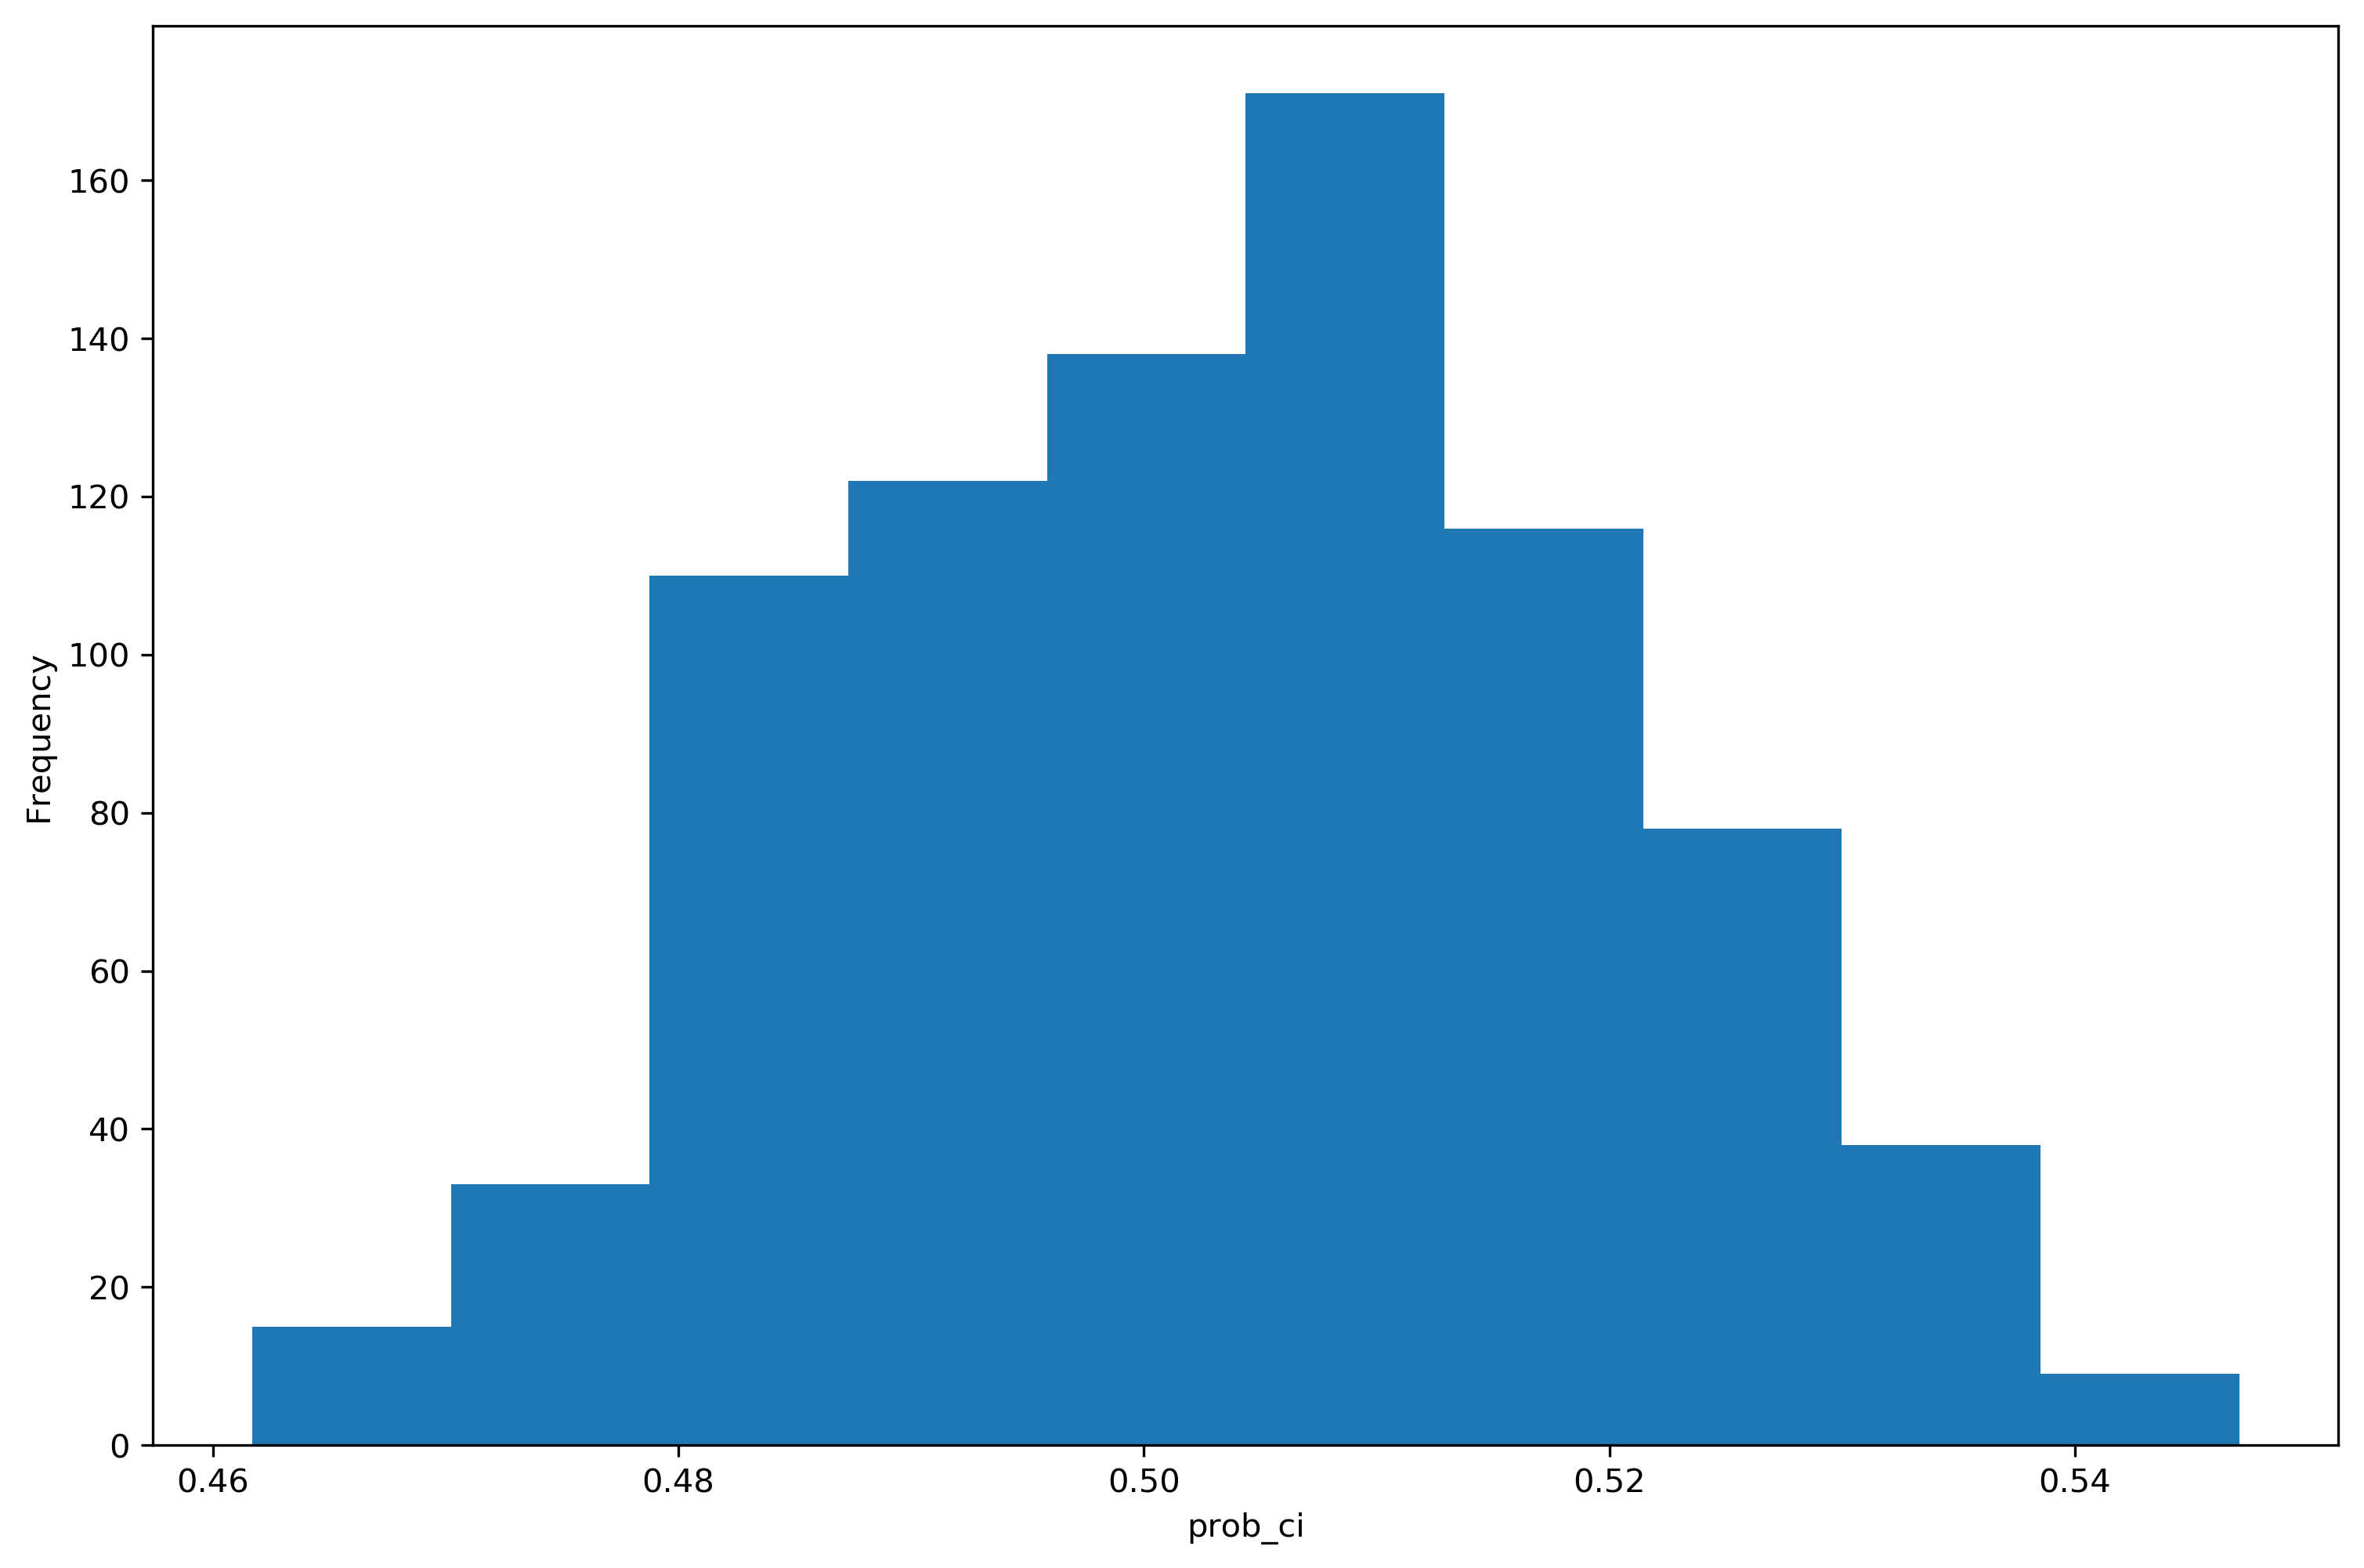

In [66]:
_ = plt.hist(df4['prob_ci'],bins = 10)
_ = plt.ylabel("Frequency")
_ = plt.xlabel("prob_ci")
plt.show()

In [67]:
df4.to_excel('mlb21_preds.xlsx')